In [1]:
import polars as pl

pl.Config.set_fmt_str_lengths(200)
pl.Config.set_fmt_float("full")

polars.config.Config

In [2]:
# these schemas were used to load the csv data and convert to parquet files.
univ3_schema = {
    '': pl.Int64,
    'protocol': pl.Utf8,
    'swaps_timestamp': pl.Int64,
    'swaps_transaction_id': pl.Utf8,
    'swaps_transaction_blockNumber': pl.Int64,
    'swaps_transaction_timestamp': pl.Int64,
    'swaps_transaction_gasPrice': pl.Float64,
    'swaps_transaction_gasUsed': pl.Int64,
    'swaps_logIndex': pl.Int64,
    'swaps_sqrtPriceX96': pl.Float64,
    'swaps_pool_id': pl.Utf8,
    'swaps_pool_feeTier': pl.Int64,
    'swaps_pool_liquidity': pl.Float64,
    'swaps_pool_token0Price': pl.Float64,
    'swaps_pool_token1Price': pl.Float64,
    'swaps_recipient': pl.Utf8,
    'swaps_sender': pl.Utf8,
    'swaps_origin': pl.Utf8,
    'swaps_amount0': pl.Float64,
    'swaps_amount1': pl.Float64,
    'swaps_token0_name': pl.Utf8,
    'swaps_token0_decimals': pl.Int64,
    'swaps_token0_symbol': pl.Utf8,
    'swaps_token1_name': pl.Utf8,
    'swaps_token1_decimals': pl.Int64,
    'swaps_token1_symbol': pl.Utf8,
}

univ2_schema = {
    '': pl.Int64,
    'protocol': pl.Utf8,
    'swaps_transaction_id': pl.Utf8,
    'swaps_transaction_blockNumber': pl.Int64,
    'swaps_transaction_timestamp': pl.Int64,
    'swaps_logIndex': pl.Int64,
    'swaps_amount0In': pl.Float64,
    'swaps_amount0Out': pl.Float64,
    'swaps_amount1In': pl.Float64,
    'swaps_amount1Out': pl.Float64,
    'swaps_amountUSD': pl.Float64,
    'swaps_from': pl.Utf8,
    'swaps_id': pl.Utf8,
    'swaps_sender': pl.Utf8,
    'swaps_to': pl.Utf8,
    'swaps_pair_id': pl.Utf8,
    'swaps_pair_reserve0': pl.Float64,
    'swaps_pair_reserve1': pl.Float64,
    'swaps_pair_token0_decimals': pl.Int64,
    'swaps_pair_token0_id': pl.Utf8,
    'swaps_pair_token0_name': pl.Utf8,
    'swaps_pair_token0_symbol': pl.Utf8,
    'swaps_pair_token1_decimals': pl.Int64,
    'swaps_pair_token1_id': pl.Utf8,
    'swaps_pair_token1_name': pl.Utf8,
    'swaps_pair_token1_symbol': pl.Utf8,
}

In [3]:
univ3_raw_dfs = pl.read_csv('data/uniswap_v3/*.csv', dtypes=univ3_schema)
univ2_raw_dfs = pl.read_csv('data/uniswap_v2/*.csv', dtypes=univ2_schema)

In [12]:
# uncomment to save to parquets
# univ3_raw_dfs.write_parquet('uniswap_sample_swaps/univ3_sample.parquet')
# univ2_raw_dfs.write_parquet('uniswap_sample_swaps/univ2_sample.parquet')

In [14]:
# load the sample parquet data
univ3_dfs = pl.read_parquet('uniswap_sample_swaps/univ3_sample.parquet')
univ2_dfs = pl.read_parquet('uniswap_sample_swaps/univ2_sample.parquet')

In [15]:
univ3_dfs.head(5)

,protocol,swaps_transaction_id,swaps_transaction_blockNumber,swaps_transaction_timestamp,swaps_transaction_gasPrice,swaps_transaction_gasUsed,swaps_logIndex,swaps_sqrtPriceX96,swaps_tick,swaps_pool_id,swaps_pool_feeTier,swaps_pool_liquidity,swaps_pool_token0Price,swaps_pool_token1Price,swaps_recipient,swaps_sender,swaps_origin,swaps_amount0,swaps_amount1,swaps_amountUSD,swaps_token0_name,swaps_token0_decimals,swaps_token0_symbol,swaps_token1_name,swaps_token1_decimals,swaps_token1_symbol
i64,str,str,i64,i64,f64,i64,i64,f64,i64,str,i64,f64,f64,f64,str,str,str,f64,f64,f64,str,i64,str,str,i64,str
0,"""uniswap_v3""","""0x00001e04e5031b8716500e419dd8fe194bee5d82f02ec7a8a19132a342f10324""",18616495,1700525627,32982822033,120463,79,424517521764716000000000000,-104588,"""0x2dd56b633faa1a5b46107d248714c9ccb6e20920""",3000,3483533791990297700000,34550.10032085175,0.000028943476016377232,"""0x98c3d3183c4b8a650614ad179a1a98be0a8d6b8e""","""0x98c3d3183c4b8a650614ad179a1a98be0a8d6b8e""","""0xa6807d794411d9a80bc435dfc4cda0ba0ddde979""",-74392.51417970784,2.1336422412829457,4321.62085877754,"""Republic Token""",18,"""REN""","""Wrapped Ether""",18,"""WETH"""
1,"""uniswap_v3""","""0x0002b79c41b8bbe27db772eff4e1787700e3626a2801bbd07bb356f24aa16758""",18616720,1700528351,65770353998,160575,272,966716516331717500000000000,-88129,"""0x824a30f2984f9013f2c8d0a29c0a3cc5fd5c0673""",3000,155566497952597350000000,4113.753771192164,0.00024308698469091902,"""0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad""","""0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad""","""0x0e21231b24af7f59ff9252ee3c7b715bd7f8d5f8""",641,-0.09515497863478384,192.74023296853014,"""Blur""",18,"""BLUR""","""Wrapped Ether""",18,"""WETH"""
2,"""uniswap_v3""","""0x00038dc2f19e4e845b1f58c2a8256358b7a64260dce18d6e0bc357eda6580ca8""",18613129,1700484851,21553856367,117329,91,299346773418540260000000000,-111576,"""0x7c3b1297ac649b36547b913de50919acb45a250c""",3000,14022286895043284000000,69732.61431996939,0.000014340492031626429,"""0x98c3d3183c4b8a650614ad179a1a98be0a8d6b8e""","""0x98c3d3183c4b8a650614ad179a1a98be0a8d6b8e""","""0x5e2b6c6b2240d582995537d3fafdb556e4a3822f""",-29564.31038831969,0.41996846278754735,849.8554160292604,"""Streamr""",18,"""DATA""","""Wrapped Ether""",18,"""WETH"""
3,"""uniswap_v3""","""0x0004347b145314141286cdaabd1aba2545092a3f57db1b51a559134afcaf5a4b""",18617160,1700533655,57318022239,139511,47,1761170280291939800000000000,-76131,"""0x60594a405d53811d3bc4766596efd80fd545a270""",500,758481639614703400000000,2047.3111210069076,0.0004884455468146827,"""0x51c72848c68a965f66fa7a88855f9f7784502a7f""","""0x51c72848c68a965f66fa7a88855f9f7784502a7f""","""0xd2700e7bbe0a8af6d6c5b3f61d27855daa425a53""",-25683.921016118114,12.68899165356763,25718.13744141207,"""Dai Stablecoin""",18,"""DAI""","""Wrapped Ether""",18,"""WETH"""
4,"""uniswap_v3""","""0x000449110a93fb27aaa0ca7018d8e926929c6bae057a1a12ce65fdd457ee5f05""",18616095,1700520755,47413857524,140133,29,3326588487267312000000000000000,74751,"""0x412940fdac1214fc3df430769f54e69210a18e49""",3000,1402209642809007000000,0.0006089571180258358,1642.1517548589911,"""0x76a49f1b6c5ad7b360fbcda7e63741a736de4954""","""0xe592427a0aece92de3edee1f18e0157c05861564""","""0x315d2ee4fccda0def532ef4108ff57204f8d9eba""",0.3451600939547534,-612.989571026243,698.6172293309779,"""Wrapped Ether""",18,"""WETH""","""ELA on Ethereum""",18,"""ELA"""


In [16]:
univ2_dfs.head(5)

,protocol,swaps_transaction_id,swaps_transaction_blockNumber,swaps_transaction_timestamp,swaps_logIndex,swaps_amountUSD,swaps_amount0In,swaps_amount0Out,swaps_amount1In,swaps_amount1Out,swaps_from,swaps_id,swaps_sender,swaps_to,swaps_pair_id,swaps_pair_reserve0,swaps_pair_reserve1,swaps_pair_token0_decimals,swaps_pair_token0_id,swaps_pair_token0_name,swaps_pair_token0_symbol,swaps_pair_token1_decimals,swaps_pair_token1_id,swaps_pair_token1_name,swaps_pair_token1_symbol
i64,str,str,i64,i64,i64,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,i64,str,str,str,i64,str,str,str
0,"""uniswap_v2""","""0x00000c8e49405c34fa6906bb55f737240872deab59abb690966c98fdd233d863""",18616340,1700523719,78,6121.4056585208,5391048233.760939,0,0,3.019354595462274,"""0x6d8003b5479e3cc8d0bbb7496679588f254d0878""","""0x00000c8e49405c34fa6906bb55f737240872deab59abb690966c98fdd233d863-0""","""0x51c72848c68a965f66fa7a88855f9f7784502a7f""","""0x51c72848c68a965f66fa7a88855f9f7784502a7f""","""0xa43fe16908251ee70ef74718545e4fe6c5ccec9f""",4606479559692.817,2421.4952632940403,18,"""0x6982508145454ce325ddbe47a25d4ec3d2311933""","""Pepe""","""PEPE""",18,"""0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2""","""Wrapped Ether""","""WETH"""
1,"""uniswap_v2""","""0x000052aa89b9581a1dcdb9e0a15d51ec63a8191cde6618c2fa9e82a39eef269e""",18614683,1700503691,391,102.95642554205011,0.05,0,0,27034637411.430805,"""0xfd750ec391e7518991a32549a6122905dd989c09""","""0x000052aa89b9581a1dcdb9e0a15d51ec63a8191cde6618c2fa9e82a39eef269e-0""","""0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad""","""0xfd750ec391e7518991a32549a6122905dd989c09""","""0xcae69e00f4f48359d94cd9cb1ae1b66c09628204""",47.54250138836155,33728570300140.063,18,"""0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2""","""Wrapped Ether""","""WETH""",18,"""0xd8e2d95c8614f28169757cd6445a71c291dec5bf""","""Grumpy Cat""","""GrumpyCat"""
2,"""uniswap_v2""","""0x000072efe8e2de089c6e92a3dbfa4785a347aac6db9eb8e8e7fdef521f95794e""",18614529,1700501843,163,3862.6901892472038,0,3926.940066,13801.888877768168,0,"""0x170acb0595c1e53f4d7e82c58bc698b7806e58e5""","""0x000072efe8e2de089c6e92a3dbfa4785a347aac6db9eb8e8e7fdef521f95794e-0""","""0xc6265979793435b496e28e61af1500c22c3ba277""","""0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852""","""0x19a4d8eab720056fa92f49680d3cb54c57a8b752""",0.000001,0.000000002744670351,6,"""0xdac17f958d2ee523a2206206994597c13d831ec7""","""Tether USD""","""USDT""",18,"""0xdb8ad3c6d7f9f364d59af9a62c3139cf5c6be88e""","""XNOVA""","""XNOVA"""
3,"""uniswap_v2""","""0x000072efe8e2de089c6e92a3dbfa4785a347aac6db9eb8e8e7fdef521f95794e""",18614529,1700501843,166,3922.578167812174,0,1.9269496776124302,3926.940066,0,"""0x170acb0595c1e53f4d7e82c58bc698b7806e58e5""","""0x000072efe8e2de089c6e92a3dbfa4785a347aac6db9eb8e8e7fdef521f95794e-1""","""0xc6265979793435b496e28e61af1500c22c3ba277""","""0xdb5889e35e379ef0498aae126fc2cce1fbd23216""","""0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852""",20868.881164440078,42727503.064549,18,"""0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2""","""Wrapped Ether""","""WETH""",6,"""0xdac17f958d2ee523a2206206994597c13d831ec7""","""Tether USD""","""USDT"""
4,"""uniswap_v2""","""0x0000917a8cad757d560df5b3ed06826b5734def200dddc4e1c0438120753d07c""",18614730,1700504255,289,15.00680042827412,1261800,0,0,0.007306909395363694,"""0x88b17dc6d69caad5a552952a7604a84690ccbcd9""","""0x0000917a8cad757d560df5b3ed06826b5734def200dddc4e1c0438120753d07c-0""","""0x7a250d5630b4cf539739df2c5dacb4c659f2488d""","""0x7a250d5630b4cf539739df2c5dacb4c659f2488d""","""0x526dee43b0c8a35f6f46773190854ecbb72a1754""",713755199.0145625,1.0497059406472113,9,"""0x03d3b7b043e307cb0f7c9e84307d28eec1085397""","""𝕏Heart𝕏""","""𝕏❤️𝕏""",18,"""0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2""","""Wrapped Ether""","""WETH"""


In [17]:
# select common fields, rename, and concat the dataframes together.
combined_uni_swaps = (
    pl.concat([
        univ3_dfs.select(
        'protocol', 'swaps_transaction_blockNumber', 
        'swaps_transaction_timestamp', 'swaps_transaction_id', 
        'swaps_amountUSD', 'swaps_token1_symbol', 
        'swaps_token0_symbol', 'swaps_pool_id'
        ), 
        univ2_dfs.select('protocol', 'swaps_transaction_blockNumber', 
                         'swaps_transaction_timestamp', 'swaps_transaction_id', 
                         'swaps_amountUSD', 'swaps_pair_token1_symbol', 
                         'swaps_pair_token0_symbol', 'swaps_pair_id'
                         ).rename({
                                'swaps_pair_token1_symbol': 'swaps_token1_symbol', 
                                'swaps_pair_token0_symbol': 'swaps_token0_symbol', 
                                'swaps_pair_id': 'swaps_pool_id'
                         })]
        ))

In [18]:
combined_uni_swaps.head(5)

protocol,swaps_transaction_blockNumber,swaps_transaction_timestamp,swaps_transaction_id,swaps_amountUSD,swaps_token1_symbol,swaps_token0_symbol,swaps_pool_id
str,i64,i64,str,f64,str,str,str
"""uniswap_v3""",18616495,1700525627,"""0x00001e04e5031b8716500e419dd8fe194bee5d82f02ec7a8a19132a342f10324""",4321.62085877754,"""WETH""","""REN""","""0x2dd56b633faa1a5b46107d248714c9ccb6e20920"""
"""uniswap_v3""",18616720,1700528351,"""0x0002b79c41b8bbe27db772eff4e1787700e3626a2801bbd07bb356f24aa16758""",192.74023296853014,"""WETH""","""BLUR""","""0x824a30f2984f9013f2c8d0a29c0a3cc5fd5c0673"""
"""uniswap_v3""",18613129,1700484851,"""0x00038dc2f19e4e845b1f58c2a8256358b7a64260dce18d6e0bc357eda6580ca8""",849.8554160292604,"""WETH""","""DATA""","""0x7c3b1297ac649b36547b913de50919acb45a250c"""
"""uniswap_v3""",18617160,1700533655,"""0x0004347b145314141286cdaabd1aba2545092a3f57db1b51a559134afcaf5a4b""",25718.13744141207,"""WETH""","""DAI""","""0x60594a405d53811d3bc4766596efd80fd545a270"""
"""uniswap_v3""",18616095,1700520755,"""0x000449110a93fb27aaa0ca7018d8e926929c6bae057a1a12ce65fdd457ee5f05""",698.6172293309779,"""ELA""","""WETH""","""0x412940fdac1214fc3df430769f54e69210a18e49"""


In [19]:
combined_uni_swaps.group_by('protocol', 'swaps_pool_id', 'swaps_token1_symbol', 'swaps_token0_symbol').agg(pl.count(), pl.col('swaps_amountUSD').sum()).sort(by='count', descending=True).head(10)

protocol,swaps_pool_id,swaps_token1_symbol,swaps_token0_symbol,count,swaps_amountUSD
str,str,str,str,u32,f64
"""uniswap_v3""","""0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640""","""WETH""","""USDC""",1377,88338005.24801911
"""uniswap_v3""","""0x11b815efb8f581194ae79006d24e0d814b7697f6""","""USDT""","""WETH""",1013,19367295.22038163
"""uniswap_v3""","""0xc7bbec68d12a0d1830360f8ec58fa599ba1b0e9b""","""USDT""","""WETH""",652,22816114.10206238
"""uniswap_v3""","""0x824a30f2984f9013f2c8d0a29c0a3cc5fd5c0673""","""WETH""","""BLUR""",532,2387419.0549251824
"""uniswap_v3""","""0x7f7ff8f22a902bb9b0aef07c6cb41d91a47e18e1""","""WETH""","""FLIP""",397,2201758.8726176824
"""uniswap_v3""","""0x844eb5c280f38c7462316aad3f338ef9bda62668""","""WETH""","""MUBI""",396,1134272.846974039
"""uniswap_v3""","""0x7a5bef8c4b1d511bc076a416b097eea798247301""","""CZ""","""WETH""",380,562199.3561059216
"""uniswap_v2""","""0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852""","""USDT""","""WETH""",362,581370.1230146098
"""uniswap_v3""","""0x4e68ccd3e89f51c3074ca5072bbac773960dfa36""","""USDT""","""WETH""",299,7182330.941255889


<Axes: title={'center': 'Swap Count and USD Vol per pool'}, xlabel='count', ylabel='swaps_amountUSD'>

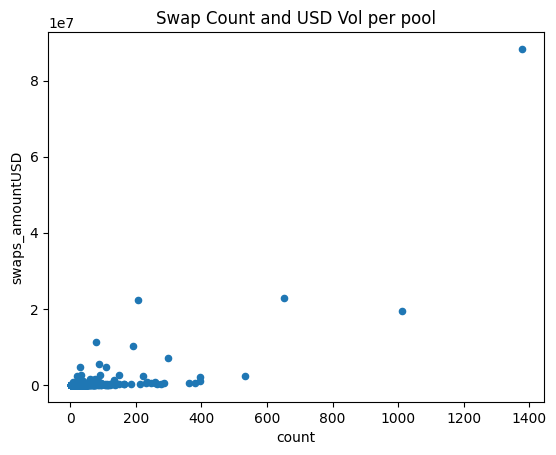

In [21]:
# converting polars to pandas requires pyarrow. Install with `pip install pyarrow`.
# plotting using `plot()` requires matplotlib. Install with `pip install matplotlib`
combined_uni_swaps.group_by('protocol', 'swaps_pool_id', 'swaps_token1_symbol', 'swaps_token0_symbol').agg(pl.count(), pl.col('swaps_amountUSD').sum()).sort(by='count', descending=True).to_pandas().plot(kind='scatter', x='count', y='swaps_amountUSD', title='Swap Count and USD Vol per pool')